# Importing Libraries

In [710]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style
%matplotlib inline

# Read the Data as Dataframe

In [711]:
# Reading Data
df_online_retail = pd.read_csv('../00_Data/data.csv', encoding= 'unicode_escape', na_values='nan')

# Initial Check of Data:
Check of shape, data types, missing values and initial statics of the columns

In [712]:
# Check shape of data 
print(df_online_retail.shape)
print("The dataframe consists of", df_online_retail.shape[1], "columns and of", df_online_retail.shape[0], "rows")

(541909, 8)
The dataframe consists of 8 columns and of 541909 rows


In [713]:
# Check first five rows of Data
df_online_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.00,United Kingdom


In [714]:
# Check Data Types
df_online_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [715]:
# Check number of missing values per column
missing_count = pd.DataFrame(df_online_retail.isnull().sum().sort_values(ascending=False), columns=['No. NA'])
missing_perc = pd.DataFrame(round(df_online_retail.isnull().sum().sort_values(ascending=False)/len(df_online_retail)*100,2), columns=['%NA']) 
missing_values = pd.concat([missing_count, missing_perc], axis=1)
missing_values

,No. NA,%NA
CustomerID,135080,24.93
Description,1454,0.27
InvoiceNo,0,0.00
StockCode,0,0.00
Quantity,0,0.00
InvoiceDate,0,0.00
UnitPrice,0,0.00
Country,0,0.00


# Analysis of Missing Data

In [716]:
# Customer ID Null 
customer_nan = df_online_retail[df_online_retail['CustomerID'].isnull()]
customer_nan.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


In [717]:
# Further missing values
customer_nan.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

All missing values in "Description" correspond to missing values in "Customer ID". Dropping NA in "Customer ID" will also clean out missing data in "Description". 

In [718]:
customer_nan.Description.unique()

array([nan, 'DECORATIVE ROSE BATHROOM BOTTLE',
       'DECORATIVE CATS BATHROOM BOTTLE', ...,
       'LANDMARK FRAME COVENT GARDEN ', 'BLUE DISCO HANDBAG',
       'CREAM HANGING HEART T-LIGHT HOLDER'], dtype=object)

In [719]:
print(customer_nan.groupby(by='Description').size().sort_values(ascending=False))

Description
DOTCOM POSTAGE                         693
JUMBO BAG RED RETROSPOT                497
JUMBO STORAGE BAG SUKI                 414
JUMBO SHOPPER VINTAGE RED PAISLEY      388
JUMBO BAG WOODLAND ANIMALS             372
                                      ... 
LANDMARK FRAME COVENT GARDEN             1
LARGE APOTHECARY MEASURING JAR           1
LARGE BONNE JAM JAR  T-LIGHT HOLDER      1
LARGE HEART FLOWERS HOOK                 1
wrongly sold sets                        1
Length: 3554, dtype: int64


**Potential Changes for Data**
- Drop all Missing Values
- Analyse Entries with Negative Quantity
- Change Datetime Type & CustomerID to String
- Use Label Encoder for StockCode & CustomerID

# Data Cleaning & Transformation

## Missing Data

In [720]:
# Data Type Transformations

# Convert Invoice Date into Date time
df_online_retail['InvoiceDate'] = pd.to_datetime(df_online_retail['InvoiceDate'])

# Sanity Check
df_online_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [721]:
# Drop NA for customer and check remaining NA
df_online_retail = df_online_retail[df_online_retail['CustomerID'].notna()]
df_online_retail.isnull().sum().sort_values(ascending=False)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [722]:
# Check Impact of Data Cleaning on Shape
initial_number_rows = 541909
print("Shape of transformed Dataframe:", df_online_retail.shape)
print(initial_number_rows - df_online_retail.shape[0], "rows were removed from the Dataframe during data cleaning.")


Shape of transformed Dataframe: (406829, 8)
135080 rows were removed from the Dataframe during data cleaning.


## Item & Label Encoding

In [723]:
# User & Item  Label Encoder 

# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Convert CustomerID to String
df_online_retail['CustomerID'] = df_online_retail['CustomerID'].astype(str)

# Set up Objects for User and Item Column
le1 = LabelEncoder()
le2 = LabelEncoder()

# Fit the encoders to the columns in question
le1.fit(df_online_retail['StockCode'])
le2.fit(df_online_retail['CustomerID'])

# Transform dataframe with encoded labels
df_online_retail['StockCode'] = le1.transform(df_online_retail['StockCode']).astype(str)
df_online_retail['CustomerID'] = le2.transform(df_online_retail['CustomerID']).astype(str)

# Check Change 
df_online_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,3249,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,4048,United Kingdom
1,536365,2649,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,4048,United Kingdom
2,536365,2855,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,4048,United Kingdom
3,536365,2803,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,4048,United Kingdom
4,536365,2802,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,4048,United Kingdom


## Strange Descriptions

In [724]:
# Most of the Strange descriptions have a negative Quantiy 
df_negative_quantity = df_online_retail[df_online_retail['Quantity']<0]
df_negative_quantity['Description'].value_counts()

REGENCY CAKESTAND 3 TIER               181
Manual                                 175
POSTAGE                                 97
JAM MAKING SET WITH JARS                86
Discount                                77
                                      ... 
FOLDING UMBRELLA CREAM POLKADOT          1
JUMBO BAG CHARLIE AND LOLA TOYS          1
LARGE CAKE TOWEL PINK SPOTS              1
AIRLINE BAG VINTAGE WORLD CHAMPION       1
PAPER CRAFT , LITTLE BIRDIE              1
Name: Description, Length: 1945, dtype: int64

In [725]:
# Most of the Strange Descriptions contain non-capital letters
# Find out if Description contains non-capital letters  
test = df_online_retail['Description'].str.contains('^(?:(?=.*[a-z])[A-Za-z]+)(?:\s|$)')

# Print unique Descriptions with non-capital letters
df_online_retail[test]['Description'].unique()

array(['Discount', 'BAG 500g SWIRLY MARBLES',
       'POLYESTER FILLER PAD 45x45cm', 'POLYESTER FILLER PAD 45x30cm',
       'POLYESTER FILLER PAD 40x40cm', 'FRENCH BLUE METAL DOOR SIGN No',
       'Manual', 'BAG 250g SWIRLY MARBLES', 'BAG 125g SWIRLY MARBLES',
       'Bank Charges', 'NUMBER TILE COTTAGE GARDEN No',
       'FOLK ART GREETING CARD,pack/12',
       'ESSENTIAL BALM 3.5g TIN IN ENVELOPE',
       'POLYESTER FILLER PAD 65CMx65CM', 'NUMBER TILE VINTAGE FONT No ',
       'POLYESTER FILLER PAD 30CMx30CM', 'POLYESTER FILLER PAD 60x40cm',
       'FLOWERS HANDBAG blue and orange', 'Next Day Carriage',
       'THE KING GIFT BAG 25x24x12cm', 'CRUK Commission',
       'High Resolution Image'], dtype=object)

In [726]:
# Some of the strange descriptions contain only one word, such as "manual" or "package". This will be analyzed
df_online_retail['Num_word_text'] = df_online_retail['Description'].apply(lambda x:len(str(x).split())) #Number Of words in main text
df_online_retail[df_online_retail['Num_word_text']==1]['Description'].unique()

array(['POSTAGE', 'Discount', 'CARRIAGE', 'Manual', 'SOMBRERO '],
      dtype=object)

In [727]:
# Filter out Discount,  Next Day Carriage, Postage 
df_online_retail = df_online_retail[df_online_retail['Description']!='Discount']
df_online_retail = df_online_retail[df_online_retail['Description']!='Next Day Carriage']
df_online_retail = df_online_retail[df_online_retail['Description']!='POSTAGE']
df_online_retail = df_online_retail[df_online_retail['Description']!='Manual']

## Users & Items with less than 10 Interactions

In [728]:
# Initial Values
initial_items_unique=df_online_retail.StockCode.nunique()
initial_users_unique=df_online_retail.CustomerID.nunique()
print("initial unique items:", initial_items_unique)
print("initial unique users:", initial_users_unique)

initial unique items: 3680
initial unique users: 4363


In [783]:
# New df with counts of unique items per User 
users_itemcounts = df_online_retail.groupby('CustomerID')['StockCode'].nunique()

# Filter out users with less than 10 unique items 
users_ten_items = users_itemcounts[users_itemcounts>=10].index

# New df with counts of unique users per Item
item_usercounts = df_online_retail.groupby('StockCode')['CustomerID'].nunique()

# Filter out items with less than 10 unique users
items_ten_users = item_usercounts[item_usercounts>=10].index

# Filter dataframe 
df_online_retail = df_online_retail[
    df_online_retail['CustomerID'].isin(users_ten_items) &
    df_online_retail['StockCode'].isin(items_ten_users)
] 


In [784]:
# Unique Users and Items
df_online_retail.nunique()

InvoiceNo        20517
StockCode         2786
Description       3000
Quantity           385
InvoiceDate      19061
UnitPrice          344
CustomerID        3696
Country             36
Num_word_text        8
dtype: int64

In [785]:
print("Excluded Items:", initial_items_unique - df_online_retail.StockCode.nunique())
print("Excluded Users:", initial_users_unique - df_online_retail.CustomerID.nunique())

Excluded Items: 894
Excluded Users: 667


# Descriptive Data Analysis

In [786]:
# Descriptive Statistics Numerical  
df_online_retail.describe()

,Quantity,UnitPrice,Num_word_text
count,396528.00,396528.00,396528.00
mean,11.68,2.89,4.41
std,39.43,4.06,1.08
min,-9360.00,0.00,1.00
25%,2.00,1.25,4.00
50%,5.00,1.95,4.00
75%,12.00,3.75,5.00
max,4800.00,295.00,8.00


In [787]:
# Descriptive Statistics Categorical
df_online_retail.describe(include='object')

,InvoiceNo,StockCode,Description,CustomerID,Country
count,396528,396528,396528,396528,396528
unique,20517,2786,3000,3696,36
top,576339,3249,WHITE HANGING HEART T-LIGHT HOLDER,4042,United Kingdom
freq,533,2032,2025,7889,353389


In [788]:
# Sparcity in %
# User x item Matrix  
matrix = pd.pivot_table(df_online_retail, values='Quantity', index='CustomerID', columns='StockCode')

# Group by InvoiceNo and calculate the number of appearances and the product of Quantity and UnitPrice
df_interactions = df_online_retail.groupby(['StockCode', 'CustomerID']).agg({'CustomerID': 'count'})

# Rename the columns
df_interactions.columns = ['NumberOrders']

# Reset the index
df_interactions.reset_index(inplace=True)

# Sparcity in %
print("Sparcity:", 100-((df_interactions.shape[0] / (matrix.shape[0]*matrix.shape[1]))*100))
print("Unique Transactions:", df_interactions.shape[0])
print("Potential Transactions:", matrix.shape[0]*matrix.shape[1])
print("Overall Transactions:", df_online_retail.shape[0])

Sparcity: 97.4760164458657
Unique Transactions: 259896
Potential Transactions: 10297056
Overall Transactions: 396528


In [789]:
259896 / 10297056

0.02523983554134308

In [790]:
396528 - 260074

136454

## Categorical Values

### InvoiceNo & Transaction Dates

In [791]:
print('Number of unique orders', df_online_retail.InvoiceNo.nunique()) 

Number of unique orders 20517


In [792]:
# Create DataFrame
# Group by InvoiceNo and calculate the number of appearances and the product of Quantity and UnitPrice
df_orders = df_online_retail.groupby('InvoiceNo').agg({'InvoiceNo': 'count', 'Quantity': 'sum', 'UnitPrice': 'sum'})

# Rename the columns
df_orders.columns = ['NoItems', 'TotalQuantity', 'TotalUnitPrice']

# Calculate the product of Quantity and UnitPrice
df_orders['Amount'] = df_orders['TotalQuantity'] * df_orders['TotalUnitPrice']

# Reset the index
df_orders.reset_index(inplace=True)

# Rename the dataframe to df_orders
df_orders = df_orders[['InvoiceNo', 'NoItems', 'Amount']]

# Print the new dataframe
df_orders.head()

,InvoiceNo,NoItems,Amount
0,536365,7,1094.80
1,536366,2,44.40
2,536367,11,3972.91
3,536368,4,286.50
4,536369,1,17.85


In [793]:
# Disable scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)
df_orders.describe()

,NoItems,Amount
count,20517.00,20517.00
mean,19.33,21340.48
std,24.09,119101.79
min,1.00,-267618.04
25%,4.00,530.86
50%,13.00,4896.95
75%,25.00,14784.60
max,533.00,5076505.96


In [794]:
# Mode of Number of Items per Order 
df_orders['NoItems'].mode()[0]

1

In [795]:
# How many orders consisted of 1 item 
len(df_orders[df_orders['NoItems']==1])

2658

In [796]:
# How many orders consisted of 1 item 
len(df_orders[df_orders['NoItems']==1])

2658

/var/folders/bs/ht_t1wp94tl3wt5xhchcxq2m0000gn/T/ipykernel_83121/2448532773.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


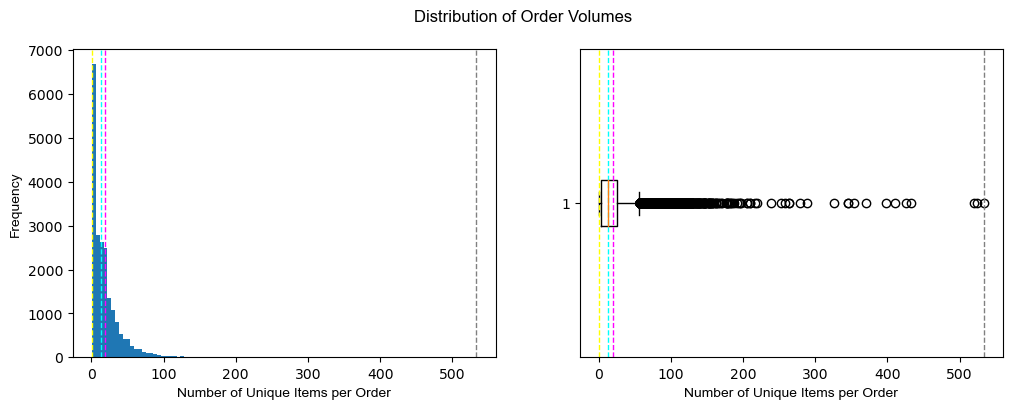

In [797]:
# Visualization of Order Volumes 
# Histogram & Boxplot

# Define feature column
feature = df_orders['NoItems']

# Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(1, 2, figsize = (12,4))


# Plot the histogram   
ax[0].hist(feature, bins=100)
ax[0].set_ylabel('Frequency', fontname='Arial')
ax[0].set_xlabel('Number of Unique Items per Order', fontname='Arial')
ax[0].ticklabel_format(useOffset=False, style='plain')

# Add lines for the mean, median, mode, min and max
ax[0].axvline(feature.min(), color = 'yellow', linestyle='dashed', linewidth = 1)
ax[0].axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=1)
ax[0].axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=1)
ax[0].axvline(feature.max(), color = 'gray', linestyle='dashed', linewidth = 1)

# Plot the boxplot   
ax[1].boxplot(feature, vert=False)
ax[1].set_xlabel('Number of Unique Items per Order', fontname='Arial')
ax[1].axvline(feature.min(), color = 'yellow', linestyle='dashed', linewidth = 1)
ax[1].axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=1)
ax[1].axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=1)
ax[1].axvline(feature.max(), color = 'gray', linestyle='dashed', linewidth = 1)

# Add a title to the Figure
fig.suptitle('Distribution of Order Volumes',fontname='Arial')

# Show the figure
fig.show()

### Number of Items per User

In [798]:
# Create DataFrmmae
# Group by InvoiceNo and calculate the number of appearances and the product of Quantity and UnitPrice
df_users = df_online_retail.groupby('CustomerID').agg({'CustomerID': 'count'})

# Rename the columns
df_users.columns = ['NumberItems']

# Reset the index
df_users.reset_index(inplace=True)

df_users.head()


,CustomerID,NumberItems
0,1,181
1,10,130
2,100,509
3,1003,54
4,1005,557


In [799]:
len(df_users[df_users['NumberItems']>=10])

3696

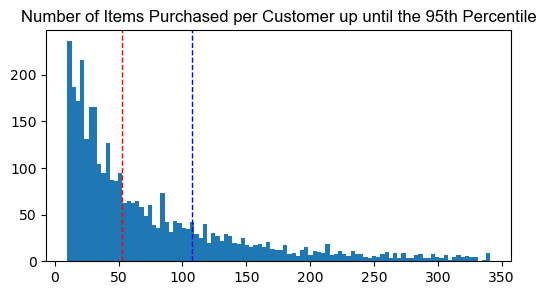

In [800]:
# Define Figure Size
plt.rcParams["figure.figsize"] = (6,3)
# Choose 
df_user_hist = df_users[df_users['NumberItems']<342]
plt.hist(df_user_hist.NumberItems, bins=100)
plt.axvline(df_users.NumberItems.median(), color = 'red', linestyle='dashed', linewidth = 1)
plt.axvline(df_users.NumberItems.mean(), color = 'blue', linestyle='dashed', linewidth = 1)
plt.title('Number of Items Purchased per Customer up until the 95th Percentile', fontname='Arial')
plt.show()

In [801]:
df_users.describe()

,NumberItems
count,3696.00
mean,107.29
std,245.26
min,10.00
25%,26.00
50%,53.00
75%,116.00
max,7889.00


In [802]:
df_users.NumberItems.quantile(.95)

341.25

### Number of Orders per Item

In [803]:
# Create DataFrmmae
# Group by InvoiceNo and calculate the number of appearances and the product of Quantity and UnitPrice
df_items = df_online_retail.groupby('StockCode').agg({'StockCode': 'count'})

# Rename the columns
df_items.columns = ['NumberOrders']

# Reset the index
df_items.reset_index(inplace=True)

df_items.head()


,StockCode,NumberOrders
0,0,49
1,1,21
2,10,12
3,100,47
4,1000,153


In [804]:
df_items.describe()

,NumberOrders
count,2786.00
mean,142.33
std,176.52
min,10.00
25%,36.00
50%,82.00
75%,176.00
max,2032.00


/var/folders/bs/ht_t1wp94tl3wt5xhchcxq2m0000gn/T/ipykernel_83121/3839021118.py:36: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


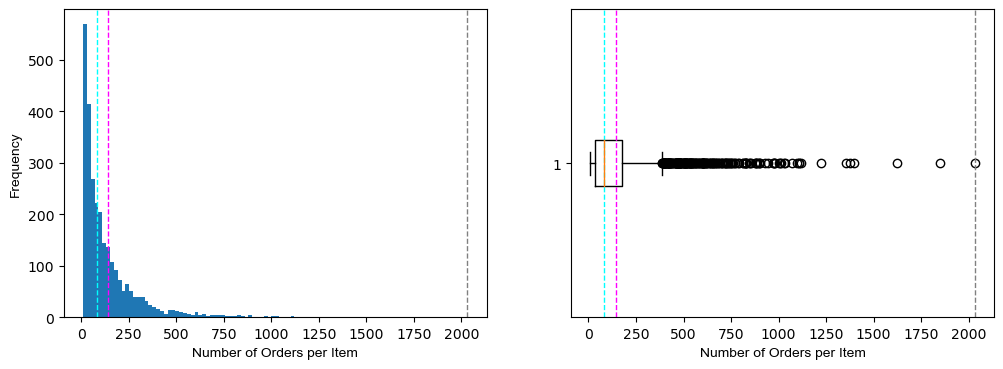

In [852]:
# Visualization of Item Purchase Frequency 
# Histogram & Boxplot

# Define feature column
feature = df_items['NumberOrders']

# Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(1, 2, figsize = (12,4))


# Plot the histogram   
ax[0].hist(feature, bins=100)
ax[0].set_ylabel('Frequency', fontname='Arial')
ax[0].set_xlabel('Number of Orders per Item', fontname='Arial')
ax[0].ticklabel_format(useOffset=False, style='plain')

# Add lines for the mean, median, mode, min and max
#ax[0].axvline(feature.min(), color = 'yellow', linestyle='dashed', linewidth = 1)
ax[0].axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=1)
ax[0].axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=1)
ax[0].axvline(feature.max(), color = 'gray', linestyle='dashed', linewidth = 1)
#ax[0].axvline(feature.quantile(.95), color = 'red', linestyle='dashed', linewidth = 1)

# Plot the boxplot   
ax[1].boxplot(feature, vert=False)
ax[1].set_xlabel('Number of Orders per Item', fontname='Arial')
#ax[1].axvline(feature.min(), color = 'yellow', linestyle='dashed', linewidth = 1)
ax[1].axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=1)
ax[1].axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=1)
ax[1].axvline(feature.max(), color = 'gray', linestyle='dashed', linewidth = 1)
#ax[1].axvline(feature.quantile(.95), color = 'red', linestyle='dashed', linewidth = 1)
# Add a title to the Figure
#fig.suptitle('Popular Items',fontname='Arial')

# Show the figure
fig.show()

In [806]:
# Threshold for Popular items at 90th quantiale 
feature.quantile(0.98)

705.0999999999954

In [807]:
# Number of items above Popularity Threshold
len(df_items[df_items['NumberOrders']>=717.4799999999996])

54

In [808]:
3699 - 717

2982

In [809]:
55 / 22982

0.0023931772691671745

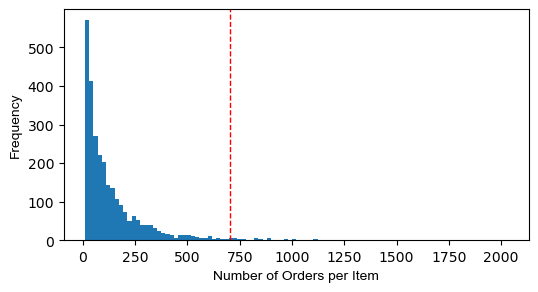

In [850]:
# Visualization Threshold
# Define feature column
feature = df_items['NumberOrders']

plt.rcParams["figure.figsize"] = (6,3)
plt.hist(feature, bins=100)
plt.ylabel('Frequency', fontname='Arial')
plt.xlabel('Number of Orders per Item', fontname='Arial')
plt.axvline(feature.quantile(.98), color = 'red', linestyle='dashed', linewidth = 1)
#plt.xlim([0,9])
plt.show()

### Re-bought Items

In [810]:
# Create DataFrmmae
# Group by InvoiceNo and calculate the number of appearances and the product of Quantity and UnitPrice
df_rebought = df_online_retail.groupby(['StockCode', 'CustomerID']).agg({'CustomerID': 'count'})

# Rename the columns
df_rebought.columns = ['NumberOrders']

# Reset the index
df_rebought.reset_index(inplace=True)

df_rebought.head()

,StockCode,CustomerID,NumberOrders
0,0,1135,1
1,0,132,1
2,0,1420,1
3,0,1614,1
4,0,1754,4


In [811]:
# Descriptive Statistics
df_rebought.describe()

,NumberOrders
count,259896.00
mean,1.53
std,1.44
min,1.00
25%,1.00
50%,1.00
75%,2.00
max,85.00


In [839]:
# How many cases more than 1 
len(df_rebought[df_rebought['NumberOrders']==1])

192384

/var/folders/bs/ht_t1wp94tl3wt5xhchcxq2m0000gn/T/ipykernel_83121/744112510.py:36: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


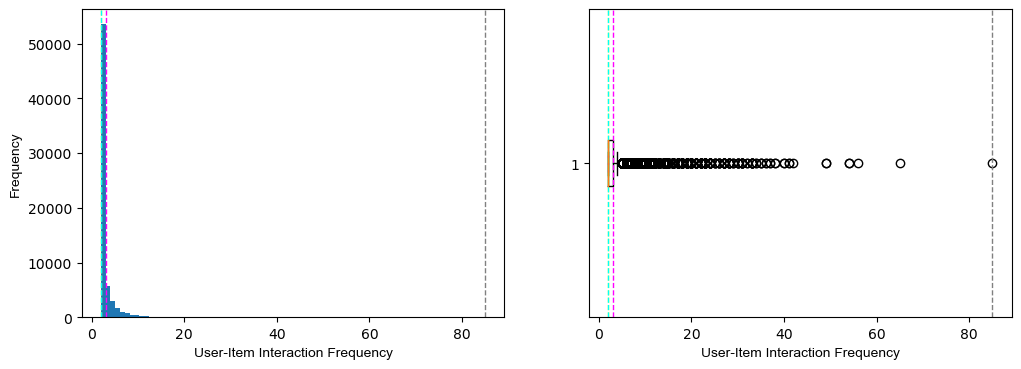

In [812]:
# Visualization of Order Volumes 
# Histogram & Boxplot

# Define feature column
feature = df_rebought[df_rebought['NumberOrders']>1]
feature = feature['NumberOrders']

# Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(1, 2, figsize = (12,4))


# Plot the histogram   
ax[0].hist(feature, bins=80)
ax[0].set_ylabel('Frequency', fontname='Arial')
ax[0].set_xlabel('User-Item Interaction Frequency', fontname='Arial')
ax[0].ticklabel_format(useOffset=False, style='plain')

# Add lines for the mean, median, mode, min and max
ax[0].axvline(feature.min(), color = 'yellow', linestyle='dashed', linewidth = 1)
ax[0].axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=1)
ax[0].axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=1)
ax[0].axvline(feature.max(), color = 'gray', linestyle='dashed', linewidth = 1)

# Plot the boxplot   
ax[1].boxplot(feature, vert=False)
ax[1].set_xlabel('User-Item Interaction Frequency', fontname='Arial')
ax[1].axvline(feature.min(), color = 'yellow', linestyle='dashed', linewidth = 1)
ax[1].axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=1)
ax[1].axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=1)
ax[1].axvline(feature.max(), color = 'gray', linestyle='dashed', linewidth = 1)

# Add a title to the Figure
#fig.suptitle('Distribution of Order Volumes',fontname='Arial')

# Show the figure
fig.show()

In [813]:
len(df_rebought[df_rebought['NumberOrders']>1])

67512

In [814]:
len(df_rebought)

259896

In [815]:
df_rebought.NumberOrders.sum() - 137651

258877

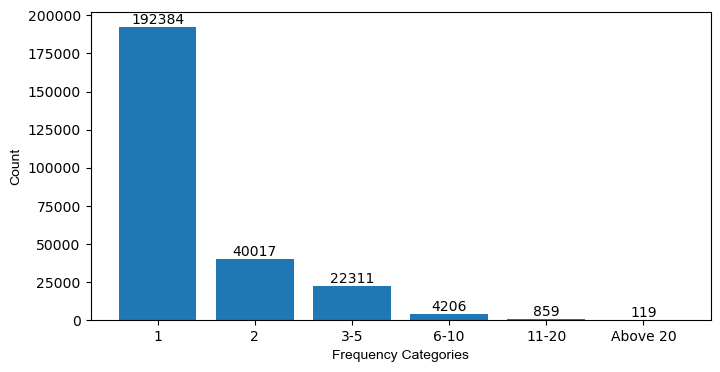

In [816]:
# Define Figure Size
plt.rcParams["figure.figsize"] = (8,4)

# Define the category ranges
bins = [0, 1,2, 5, 10, 20, np.inf]

# Assign labels for each category
labels = ['1', '2','3-5', '6-10', '11-20', 'Above 20']

# Use the pandas 'cut' function to assign categories to each value in the 'numerical_feature' column
df_rebought['category'] = pd.cut(df_rebought['NumberOrders'], bins=bins, labels=labels)

# Count the number of occurrences in each category
counts = df_rebought['category'].value_counts().sort_index()

# Prepare the data for the bar plot
categories = np.arange(len(labels))

# Create the bar plot
bars = plt.bar(categories, counts)

# Set the y-axis labels
plt.xticks(categories, labels=labels)

# Add counts on top of each bar
for i, bar in enumerate(bars):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        counts[i],
        ha='center',
        va='bottom',
    )
    
#plt.title('How many times did users buy the same item?',fontname='Arial')
plt.xlabel('Frequency Categories',fontname='Arial')
plt.ylabel('Count',fontname='Arial')

# Display the plot
plt.show()

### Cancelled Orders

In [817]:
# Rows that start with a C in InvoiceNo -- All Cancellations but 
df_cancellations = df_online_retail[df_online_retail.InvoiceNo.str[0]=='C']
df_cancellations.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Num_word_text
258682,C559667,1553,ROSES REGENCY TEACUP AND SAUCER,-2,2011-07-11 13:38:00,2.95,701,United Kingdom,5
170566,C551336,1805,JAM MAKING SET WITH JARS,-1,2011-04-27 16:53:00,4.25,1226,United Kingdom,5
111732,C545823,487,SMALL GLASS HEART TRINKET POT,-3,2011-03-07 12:54:00,2.10,1147,United Kingdom,5
516181,C579878,2004,CLASSIC GLASS COOKIE JAR,-4,2011-11-30 17:12:00,4.15,3671,United Kingdom,4
352807,C567691,708,RED SPOT CERAMIC DRAWER KNOB,-85,2011-09-21 17:04:00,1.45,3844,United Kingdom,5
44913,C540246,2425,PINK/WHITE CHRISTMAS TREE 60CM,-1,2011-01-05 15:43:00,0.65,564,United Kingdom,4
411642,C572226,2071,SET OF 4 KNICK KNACK TINS LEAF,-2,2011-10-21 13:58:00,4.15,2201,United Kingdom,7
433553,C573929,1092,POPCORN HOLDER,-1,2011-11-02 10:14:00,0.85,4023,United Kingdom,2
255423,C559345,573,BASKET OF TOADSTOOLS,-408,2011-07-07 17:16:00,1.06,1218,United Kingdom,3
294924,C562728,1697,BREAD BIN DINER STYLE PINK,-4,2011-08-09 09:41:00,14.95,47,Denmark,5


In [818]:
# Random Check
df_online_retail[df_online_retail['CustomerID']=='3226']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Num_word_text
19510,537867,1621,FAMILY PHOTO FRAME CORNICE,2,2010-12-08 16:48:00,9.95,3226,United Kingdom,4
19511,537867,1634,GUMBALL MAGAZINE RACK,2,2010-12-08 16:48:00,7.65,3226,United Kingdom,3
19512,537867,1638,SQUARECUSHION COVER PINK UNION FLAG,2,2010-12-08 16:48:00,6.75,3226,United Kingdom,5
19513,537867,1686,HOT WATER BOTTLE BABUSHKA,8,2010-12-08 16:48:00,4.65,3226,United Kingdom,4
19514,537867,1014,SCOTTIE DOG HOT WATER BOTTLE,6,2010-12-08 16:48:00,4.95,3226,United Kingdom,5
...,...,...,...,...,...,...,...,...,...
472518,576688,2347,I LOVE LONDON WALL ART,6,2011-11-16 12:16:00,4.95,3226,United Kingdom,5
472519,576688,1305,12 COLOURED PARTY BALLOONS,20,2011-11-16 12:16:00,0.65,3226,United Kingdom,4
516381,C579887,3107,ANTIQUE SILVER T-LIGHT GLASS,-1,2011-11-30 17:42:00,1.25,3226,United Kingdom,4
516382,C579887,3198,15CM CHRISTMAS GLASS BALL 20 LIGHTS,-1,2011-11-30 17:42:00,7.95,3226,United Kingdom,6


In [819]:
# How many of the Quantities are below one
quantity_values = matrix.values
below1 = np.sum(quantity_values < 1 )
print(below1)

2615


In [820]:
quantity_values.shape

(3696, 2786)

In [851]:
df_cancellations.shape

(8106, 9)

### Country of Origin

In [821]:
df_online_retail['Country'].value_counts(normalize=False)

United Kingdom          353389
Germany                   9010
France                    8106
EIRE                      7329
Spain                     2415
Netherlands               2316
Belgium                   1920
Switzerland               1829
Portugal                  1430
Australia                 1237
Norway                    1055
Italy                      780
Channel Islands            742
Cyprus                     611
Finland                    606
Sweden                     426
Austria                    383
Denmark                    371
Japan                      337
Poland                     334
USA                        288
Israel                     248
Unspecified                240
Singapore                  214
Iceland                    181
Greece                     140
Canada                     140
Malta                      119
United Arab Emirates        65
European Community          58
RSA                         57
Lebanon                     45
Lithuani

In [822]:
# Create DataFrame
df_user_country = df_online_retail.groupby('Country')['CustomerID'].nunique()

# Rename the columns
#df_user_country.columns = ['UniqueCustomers']

# Reset the index
#df_user_country.reset_index(inplace=True)

# Head
df_user_country

Country
Australia                  8
Austria                   10
Bahrain                    1
Belgium                   22
Brazil                     1
Canada                     2
Channel Islands            7
Cyprus                     8
Czech Republic             1
Denmark                    8
EIRE                       3
European Community         1
Finland                    9
France                    81
Germany                   90
Greece                     4
Iceland                    1
Israel                     3
Italy                     14
Japan                      5
Lebanon                    1
Lithuania                  1
Malta                      2
Netherlands                7
Norway                    10
Poland                     5
Portugal                  19
RSA                        1
Singapore                  1
Spain                     26
Sweden                     7
Switzerland               20
USA                        4
United Arab Emirates       2
United

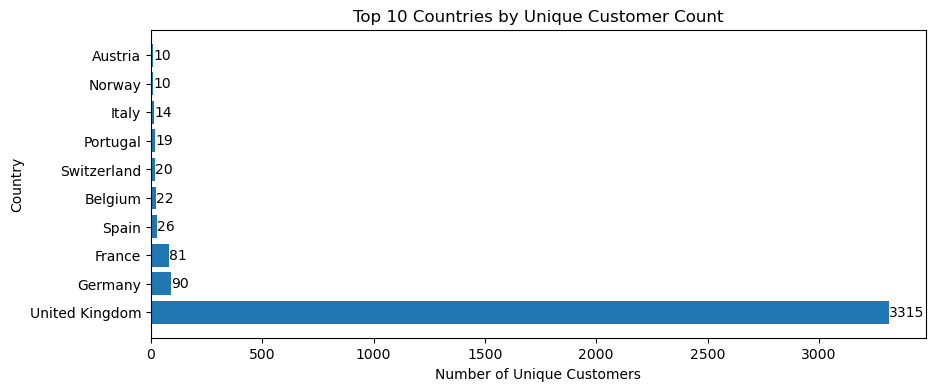

In [823]:
# Define Figure Size
plt.rcParams["figure.figsize"] = (10,4)

# Sort values in descending order 
df_user_country = df_user_country.sort_values(ascending=False)

# Allocate top ten into new dataframe 
top_10_countries = df_user_country.head(10)

# Create a horizontal bar chart
fig, ax = plt.subplots()
ax.barh(top_10_countries.index, top_10_countries.values)

# Display the unique customer count at the end of each bar
for i, (country, count) in enumerate(top_10_countries.items()):
    ax.text(count, i, f'{count}', ha='left', va='center')

# Set labels and title
ax.set_xlabel('Number of Unique Customers')
ax.set_ylabel('Country')
ax.set_title('Top 10 Countries by Unique Customer Count')

# Show the plot
plt.show()

### Popular Items

In [824]:
df_online_retail['Num_word_text'] = df_online_retail['Description'].apply(lambda x:len(str(x).split())) #Number Of words in main text
df_online_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Num_word_text
0,536365,3249,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,4048,United Kingdom,5
1,536365,2649,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,4048,United Kingdom,3
2,536365,2855,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,4048,United Kingdom,5
3,536365,2803,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,4048,United Kingdom,6
4,536365,2802,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,4048,United Kingdom,5


In [825]:
df_online_retail.Num_word_text.describe()

count   396528.00
mean         4.41
std          1.08
min          1.00
25%          4.00
50%          4.00
75%          5.00
max          8.00
Name: Num_word_text, dtype: float64

In [826]:
df_online_retail.Num_word_text.mode()

0    4
Name: Num_word_text, dtype: int64

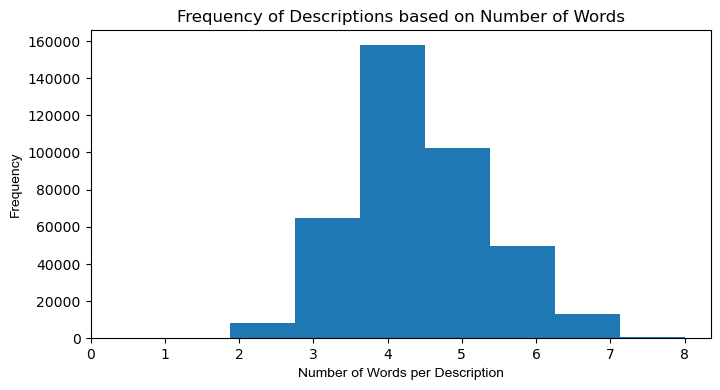

In [827]:
plt.rcParams["figure.figsize"] = (8,4)
plt.hist(df_online_retail.Num_word_text, bins=8)
plt.ylabel('Frequency', fontname='Arial')
plt.xlabel('Number of Words per Description', fontname='Arial')
plt.title('Frequency of Descriptions based on Number of Words')
plt.xticks(range(9))
#plt.xlim([0,9])
plt.show()

In [828]:
# Check Descriptions with only one word 
df_online_retail[df_online_retail['Num_word_text']==1]['Description'].unique()

array(['CARRIAGE', 'SOMBRERO '], dtype=object)

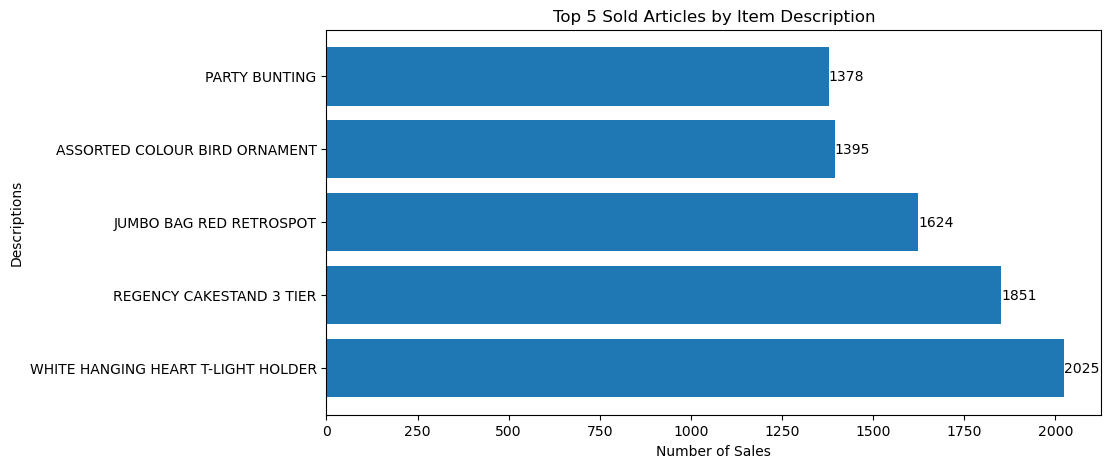

In [829]:
# Define Figure Size
plt.rcParams["figure.figsize"] = (10,5)

# Sort values in descending order 
top_10_desc = df_online_retail.groupby(by='Description').size().sort_values(ascending=False).head(5)

# Create a horizontal bar chart
fig, ax = plt.subplots()
ax.barh(top_10_desc.index, top_10_desc.values)

# Display the unique customer count at the end of each bar
for i, (country, count) in enumerate(top_10_desc.items()):
    ax.text(count, i, f'{count}', ha='left', va='center')

# Set labels and title
ax.set_xlabel('Number of Sales')
ax.set_ylabel('Descriptions')
ax.set_title('Top 5 Sold Articles by Item Description')

# Show the plot
plt.show()

# Sonstige

In [830]:
# Time Range of Transactions
print('First Transaction Date:\t', df_online_retail.InvoiceDate.min())
print('Last Transaction Date:\t', df_online_retail.InvoiceDate.max())

First Transaction Date:	 2010-12-01 08:26:00
Last Transaction Date:	 2011-12-09 12:50:00


In [831]:
# Popular Products 
print(df_online_retail.groupby(by='Description').size().sort_values(ascending=False).head(10))

Description
WHITE HANGING HEART T-LIGHT HOLDER    2025
REGENCY CAKESTAND 3 TIER              1851
JUMBO BAG RED RETROSPOT               1624
ASSORTED COLOUR BIRD ORNAMENT         1395
PARTY BUNTING                         1378
LUNCH BAG RED RETROSPOT               1352
SET OF 3 CAKE TINS PANTRY DESIGN      1221
LUNCH BAG  BLACK SKULL.               1117
PACK OF 72 RETROSPOT CAKE CASES       1069
SPOTTY BUNTING                        1022
dtype: int64


# NEW Csv Cleaned

In [832]:
df_online_retail.to_csv('../00_Data/online_retailed_precleaned.csv')